<a href="https://colab.research.google.com/github/AkbarIsmayilov/NN_FINAL/blob/main/CNNnumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# -*- coding: utf-8 -*-
# """convolution_pooling(stride,padding)_flatten.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1dXrb3n-hHXTQUqLt27ALnFi7txJMH6ls
# """

# # Importing libraries
# import numpy as np
# from numpy.lib.stride_tricks import as_strided
# import matplotlib.pyplot as plt
# from PIL import Image
# import itertools 
# from numpy import asarray

# # Convolution
# def gen_idx_conv1d(in_size, ker_size):
#     """
#     Generates a list of indices. This indices correspond to the indices
#     of a 1D input tensor on which we would like to apply a 1D convolution.

#     For instance, with a 1D input array of size 5 and a kernel of size 3, the
#     1D convolution product will successively looks at elements of indices [0,1,2],
#     [1,2,3] and [2,3,4] in the input array. In this case, the function idx_conv1d(5,3) 
#     outputs the following array: array([0,1,2,1,2,3,2,3,4]).

#     args:
#         in_size: (type: int) size of the input 1d array.
#         ker_size: (type: int) kernel size.

#     return:
#         idx_list: (type: np.array) list of the successive indices of the 1D input array
#         access to the 1D convolution algorithm.

#     example:
#         >>> gen_idx_conv1d(in_size=5, ker_size=3)
#         array([0, 1, 2, 1, 2, 3, 2, 3, 4])
#     """
#     f = lambda dim1, dim2, axis: np.reshape(np.tile(np.expand_dims(np.arange(dim1),axis),dim2),-1)
#     out_size = in_size-ker_size+1
#     return f(ker_size, out_size, 0)+f(out_size, ker_size, 1)

# def repeat_idx_2d(idx_list, nbof_rep, axis):
#     """
#     Repeats an array of indices (idx_list) a number of time (nbof_rep) "along" an axis
#     (axis). This function helps to browse through a 2d array of size
#     (len(idx_list),nbof_rep).

#     args:
#         idx_list: (type: np.array or list) a 1D array of indices.
#         nbof_rep: (type: int) number of repetition.
#         axis: (type: int) axis "along" which the repetition will be applied.

#     return
#         idx_list: (type: np.array) a 1D array of indices of size len(idx_list)*nbof_rep.

#     example:
#         >>> a = np.array([0, 1, 2])
#         >>> repeat_idx_2d(a, 3, 0) # repeats array 'a' 3 times along 'axis' 0
#         array([0, 0, 0, 1, 1, 1, 2, 2, 2])

#         >>> repeat_idx_2d(a, 3, 1) # repeats array 'a' 3 times along 'axis' 1
#         array([0, 1, 2, 0, 1, 2, 0, 1, 2])

#         >>> b = np.reshape(np.arange(3*4), (3,4))
#         >>> b[repeat_idx_2d(np.arange(3), 4, 0), repeat_idx_2d(np.arange(4), 3, 1)]
#         array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#     """
#     assert axis in [0,1], "Axis should be equal to 0 or 1."
#     tile_axis = (nbof_rep,1) if axis else (1,nbof_rep)
#     return np.reshape(np.tile(np.expand_dims(idx_list, 1),tile_axis),-1)

# def conv2d(im, ker):
#     """
#     Performs a 'valid' 2D convolution on an image. The input image may be
#     a 2D or a 3D array.

#     The output image first two dimensions will be reduced depending on the 
#     convolution size. 

#     The kernel may be a 2D or 3D array. If 2D, it will be applied on every
#     channel of the input image. If 3D, its last dimension must match the
#     image one.

#     args:
#         im: (type: np.array) image (2D or 3D).
#         ker: (type: np.array) convolution kernel (2D or 3D).

#     returns:
#         im: (type: np.array) convolved image.

#     example:
#         >>> im = np.reshape(np.arange(10*10*3),(10,10,3))/(10*10*3) # 3D image
#         >>> ker = np.array([[0,1,0],[-1,0,1],[0,-1,0]]) # 2D kernel
#         >>> conv2d(im, ker) # 3D array of shape (8,8,3)
#     """
#     if len(im.shape)==2: # it the image is a 2D array, it is reshaped by expanding the last dimension
#         im = np.expand_dims(im,-1)

#     im_x, im_y, im_w = im.shape

#     if len(ker.shape)==2: # if the kernel is a 2D array, it is reshaped so it will be applied to all of the image channels
#         ker = np.tile(np.expand_dims(ker,-1),[1,1,im_w]) # the same kernel will be applied to all of the channels 

#     assert ker.shape[-1]==im.shape[-1], "Kernel and image last dimension must match."

#     ker_x = ker.shape[0]
#     ker_y = ker.shape[1]

#     # shape of the output image
#     out_x = im_x - ker_x + 1 
#     out_y = im_y - ker_y + 1

#     # reshapes the image to (out_x, ker_x, out_y, ker_y, im_w)
#     idx_list_x = gen_idx_conv1d(im_x, ker_x) # computes the indices of a 1D conv (cf. idx_conv1d doc)
#     idx_list_y = gen_idx_conv1d(im_y, ker_y)

#     idx_reshaped_x = repeat_idx_2d(idx_list_x, len(idx_list_y), 0) # repeats the previous indices to be used in 2D (cf. repeat_idx_2d doc)
#     idx_reshaped_y = repeat_idx_2d(idx_list_y, len(idx_list_x), 1)

#     im_reshaped = np.reshape(im[idx_reshaped_x, idx_reshaped_y, :], [out_x, ker_x, out_y, ker_y, im_w]) # reshapes

#     # reshapes the 2D kernel
#     ker = np.reshape(ker,[1, ker_x, 1, ker_y, im_w])

#     # applies the kernel to the image and reduces the dimension back to the one of original input image
#     return np.squeeze(np.sum(im_reshaped*ker, axis=(1,3)))

# # Pooling 
# def pool2d(A, kernel_size, stride, padding=0, pool_mode='max'):
#     '''
#     2D Pooling
    
#     Parameters:
#         A: input 2D array
#         kernel_size: int, the size of the window over which we take pool
#         stride: int, the stride of the window
#         padding: int, implicit zero paddings on both sides of the input
#         pool_mode: string, 'max' or 'avg'
#     '''
#     # Padding
#     A = np.pad(A, padding, mode='constant')
    
#     # Window view of A
#     output_shape = ((A.shape[0] - kernel_size) // stride + 1,
#                     (A.shape[1] - kernel_size) // stride + 1)
    
#     shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
#     strides_w = (stride*A.strides[0], stride*A.strides[1], A.strides[0], A.strides[1])
    
#     A_w = as_strided(A, shape_w, strides_w)
    
#     # Return the result of pooling
#     if pool_mode == 'max':
#         return A_w.max(axis=(2, 3))
#     elif pool_mode == 'avg':
#         return A_w.mean(axis=(2, 3))

# # Convolution process
# image = np.array(Image.open(r"/content/Mnist_3.png"))
# ker = np.array([[0,1,0],[-1,0,1],[0,-1,0]]) # 2D kernel
# conv_processed_image = conv2d(image,ker)
# print(conv_processed_image)

# # Pooling process
# pool_processed_image = pool2d(conv_processed_image, kernel_size=2, stride=1, padding=0, pool_mode='max')
# print(pool_processed_image)

# # Flattening process
# merged = list(itertools.chain(*pool_processed_image))
# print(merged)

Debugging
# del conv_processed_image
# del pool_processed_image

NameError: ignored

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

mnist.data.shape

(70000, 784)

In [25]:
img1  =  mnist.data.loc[[0]]   

# img1.shape

arr1 = np.reshape(np.array(img1), (28,28))

arr1



array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [26]:
def convolution2d(image, kernel, stride, padding):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    return new_image

    

In [ ]:

# Pooling 
def pool2d(A, kernel_size, stride, padding=0, pool_mode='max'):
    '''
    2D Pooling
    
    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window over which we take pool
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')
    
    # Window view of A
    output_shape = ((A.shape[0] - kernel_size) // stride + 1,
                    (A.shape[1] - kernel_size) // stride + 1)
    
    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*A.strides[0], stride*A.strides[1], A.strides[0], A.strides[1])
    
    A_w = as_strided(A, shape_w, strides_w)
    
    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return A_w.mean(axis=(2, 3))


In [29]:
# Convolution process
# image = np.array()
ker = np.array([[0,1,0],[-1,0,1],[0,-1,0]]) # 2D kernel
conv_processed_image = conv2d(arr1,ker)
print("CONV " , conv_processed_image)

# Pooling process
pool_processed_image = pool2d(conv_processed_image, kernel_size=2, stride=1, padding=0, pool_mode='max')
print("POOL", pool_processed_image)

CONV  [[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -3.
   -18.  -18.  -18. -126. -136. -175.  -26. -166. -255. -247. -127.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  -30.  -36.  -94. -151. -152.
  -238. -253. -145. -135. -204. -335. -181.  -24. -161. -323. -311. -127.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.  -19. -202. -189. -135. -177. -151.
  -152. -235. -235. -127. -143.    1.  -28.  154.  141.   30.  -68.  -64.
     0.    0.]
 [   0.    0.   

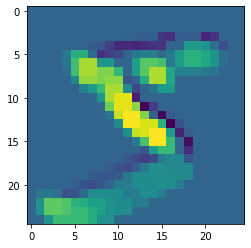

In [31]:
plt.imshow(pool_processed_image)


        